# Data Preparation

### Meter A
Contains 87 instances of physical diagnostic parameters for an 8-path liquid USM. It
has 37 attributes(features) and 2 classes or health states: \
(1) -- Flatness ratio \
(2) -- Symmetry \
(3) -- Crossflow \
(4)-(11) -- Flow velocity in each of the eight paths \
(12)-(19) -- Speed of sound in each of the eight paths \
(20) -- Average speed of sound in all eight paths \
(21)-(36) -- Gain at both ends of each of the eight paths \
(37) -- Class attribute or health state of meter: 1,2 \
Class '1' - Healthy \
Class '2' - Installation effects 

#### Merging Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
meter_a_df = pd.read_csv("./dataset/Meter A", sep="\t", header=None)
meter_a_headers = ['Flatness Ratio',
                      'Symmetry',
                      'Crossflow',
                      'Flow Velocity 1',
                      'Flow Velocity 2',
                      'Flow Velocity 3',
                      'Flow Velocity 4',
                      'Flow Velocity 5',
                      'Flow Velocity 6',
                      'Flow Velocity 7',
                      'Flow Velocity 8',
                      'Speed of Sound 1',
                      'Speed of Sound 2',
                      'Speed of Sound 3',
                      'Speed of Sound 4',
                      'Speed of Sound 5',
                      'Speed of Sound 6',
                      'Speed of Sound 7',
                      'Speed of Sound 8',
                      'Average Speed of Sound',
                      'Gain at both ends 1',
                      'Gain at both ends 2',
                      'Gain at both ends 3',
                      'Gain at both ends 4',
                      'Gain at both ends 5',
                      'Gain at both ends 6',
                      'Gain at both ends 7',
                      'Gain at both ends 8',
                      'Gain at both ends 9',
                      'Gain at both ends 10',
                      'Gain at both ends 11',
                      'Gain at both ends 12',
                      'Gain at both ends 13',
                      'Gain at both ends 14',
                      'Gain at both ends 15',
                      'Gain at both ends 16',
                      'Class Attribute/Health State']
meter_a_df.columns = meter_a_headers
meter_a_df.loc[meter_a_df['Class Attribute/Health State'] == 2, 'Class Attribute/Health State'] = 3         # change label 2 to 3, for common class label across all datasets
meter_a_df_x = meter_a_df.drop(['Class Attribute/Health State'], axis=1, inplace=False)
meter_a_df_y = meter_a_df[['Class Attribute/Health State']].copy()

meter_b_df = pd.read_csv("./dataset/Meter B", sep="\t", header=None)
meter_b_headers = [
    'Profile Factor',
    'Symmetry',
    'Crossflow',
    'Swirl Angle',
    'Flow Velocity 1',
    'Flow Velocity 2',
    'Flow Velocity 3',
    'Flow Velocity 4',
    'Average flow velocity in all four paths',
    'Speed of Sound 1',
    'Speed of Sound 2',
    'Speed of Sound 3',
    'Speed of Sound 4',
    'Average Speed of Sound',
    'Signal Strength 1',
    'Signal Strength 2',
    'Signal Strength 3',
    'Signal Strength 4',
    'Signal Strength 5',
    'Signal Strength 6',
    'Signal Strength 7',
    'Signal Strength 8',
    'Turbulence 1',
    'Turbulence 2',
    'Turbulence 3',
    'Turbulence 4',
    'Meter Performance',
    'Signal Quality 1',
    'Signal Quality 2',
    'Signal Quality 3',
    'Signal Quality 4',
    'Signal Quality 5',
    'Signal Quality 6',
    'Signal Quality 7',
    'Signal Quality 8',
    'Gain at both ends 1',
    'Gain at both ends 2',
    'Gain at both ends 3',
    'Gain at both ends 4',
    'Gain at both ends 5',
    'Gain at both ends 6',
    'Gain at both ends 7',
    'Gain at both ends 8',
    'Transit Time 1',
    'Transit Time 2',
    'Transit Time 3',
    'Transit Time 4',
    'Transit Time 5',
    'Transit Time 6',
    'Transit Time 7',
    'Transit Time 8',
    'Class Attribute/Health State'
]
meter_b_df.columns = meter_b_headers
meter_a_df.loc[meter_a_df['Class Attribute/Health State'] == 3, 'Class Attribute/Health State'] = 4         # change label 3 to 4, for common class label across all datasets
meter_b_df_x = meter_b_df.drop(meter_b_df.columns[51], axis=1, inplace=False)
meter_b_df_y = meter_b_df[['Class Attribute/Health State']].copy()

meter_d_df = pd.read_csv("./dataset/Meter D", sep="\t", header=None)
meter_d_headers=[
    'Profile Factor',
    'Symmetry',
    'Crossflow',
    'Flow Velocity 1',
    'Flow Velocity 2',
    'Flow Velocity 3',
    'Flow Velocity 4',
    'Speed of Sound 1',
    'Speed of Sound 2',
    'Speed of Sound 3',
    'Speed of Sound 4',
    'Signal Strength 1',
    'Signal Strength 2',
    'Signal Strength 3',
    'Signal Strength 4',
    'Signal Strength 5',
    'Signal Strength 6',
    'Signal Strength 7',
    'Signal Strength 8',
    'Signal Quality 1',
    'Signal Quality 2',
    'Signal Quality 3',
    'Signal Quality 4',
    'Signal Quality 5',
    'Signal Quality 6',
    'Signal Quality 7',
    'Signal Quality 8',
    'Gain at both ends 1',
    'Gain at both ends 2',
    'Gain at both ends 3',
    'Gain at both ends 4',
    'Gain at both ends 5',
    'Gain at both ends 6',
    'Gain at both ends 7',
    'Gain at both ends 8',
    'Transit Time 1',
    'Transit Time 2',
    'Transit Time 3',
    'Transit Time 4',
    'Transit Time 5',
    'Transit Time 6',
    'Transit Time 7',
    'Transit Time 8',
    'Class Attribute/Health State'
]
meter_d_df.columns = meter_d_headers
meter_d_df_x = meter_d_df.drop(meter_d_df.columns[36], axis=1, inplace=False)
meter_d_df_y = meter_d_df[['Class Attribute/Health State']].copy()


In [2]:
print('Meter A class labels:', meter_a_df['Class Attribute/Health State'].unique(), 'Meter A size:', meter_a_df.shape)
print('Meter B class labels:', meter_b_df['Class Attribute/Health State'].unique(), 'Meter B size:', meter_b_df.shape)
print('Meter D class labels:', meter_d_df['Class Attribute/Health State'].unique(), 'Meter D size:', meter_d_df.shape)

Meter A class labels: [1 4] Meter A size: (87, 37)
Meter B class labels: [1 2 3] Meter B size: (92, 52)
Meter D class labels: [1 2 3 4] Meter D size: (180, 44)


### Unionize datasets of Meter A, B, and D.
Union of all datasets, and filling up missing columns with NaN values for further processing later on.

In [3]:
diff = meter_b_df.columns.difference(meter_a_df.columns)
print('Meter A missing columns from B:', diff.shape[0], diff.tolist())
# check for 
a = np.full(shape=(meter_a_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_a_full_df = pd.concat([meter_a_df, a], axis=1)
diff = meter_d_df.columns.difference(meter_a_full_df.columns)
print('New Meter A missing columns from D:', diff.shape[0], diff.tolist())
a = np.full(shape=(meter_a_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_a_full_df = pd.concat([meter_a_full_df, a], axis=1)
meter_a_full_df.shape


Meter A missing columns from B: 32 ['Average flow velocity in all four paths', 'Meter Performance', 'Profile Factor', 'Signal Quality 1', 'Signal Quality 2', 'Signal Quality 3', 'Signal Quality 4', 'Signal Quality 5', 'Signal Quality 6', 'Signal Quality 7', 'Signal Quality 8', 'Signal Strength 1', 'Signal Strength 2', 'Signal Strength 3', 'Signal Strength 4', 'Signal Strength 5', 'Signal Strength 6', 'Signal Strength 7', 'Signal Strength 8', 'Swirl Angle', 'Transit Time 1', 'Transit Time 2', 'Transit Time 3', 'Transit Time 4', 'Transit Time 5', 'Transit Time 6', 'Transit Time 7', 'Transit Time 8', 'Turbulence 1', 'Turbulence 2', 'Turbulence 3', 'Turbulence 4']
New Meter A missing columns from D: 0 []


(87, 69)

In [4]:
diff = meter_a_df.columns.difference(meter_b_df.columns)
print('Meter B missing columns from A:', diff.shape[0], diff.tolist())
# check for 
a = np.full(shape=(meter_b_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_b_full_df = pd.concat([meter_b_df, a], axis=1)
diff = meter_d_df.columns.difference(meter_b_full_df.columns)
print('New Meter B missing columns from D:', diff.shape[0], diff.tolist())
a = np.full(shape=(meter_b_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_b_full_df = pd.concat([meter_b_full_df, a], axis=1)
meter_b_full_df.shape


Meter B missing columns from A: 17 ['Flatness Ratio', 'Flow Velocity 5', 'Flow Velocity 6', 'Flow Velocity 7', 'Flow Velocity 8', 'Gain at both ends 10', 'Gain at both ends 11', 'Gain at both ends 12', 'Gain at both ends 13', 'Gain at both ends 14', 'Gain at both ends 15', 'Gain at both ends 16', 'Gain at both ends 9', 'Speed of Sound 5', 'Speed of Sound 6', 'Speed of Sound 7', 'Speed of Sound 8']
New Meter B missing columns from D: 0 []


(92, 69)

In [5]:
diff = meter_a_df.columns.difference(meter_d_df.columns)
print('Meter D missing columns from A:', diff.shape[0], diff.tolist())
# check for 
a = np.full(shape=(meter_d_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_d_full_df = pd.concat([meter_d_df, a], axis=1)
diff = meter_b_df.columns.difference(meter_d_full_df.columns)
print('New Meter D missing columns from B:', diff.shape[0], diff.tolist())
a = np.full(shape=(meter_d_df.shape[0], diff.shape[0]), fill_value=np.nan)
a = pd.DataFrame(a, columns=diff.tolist())
meter_d_full_df = pd.concat([meter_d_full_df, a], axis=1)
meter_d_full_df.shape


Meter D missing columns from A: 18 ['Average Speed of Sound', 'Flatness Ratio', 'Flow Velocity 5', 'Flow Velocity 6', 'Flow Velocity 7', 'Flow Velocity 8', 'Gain at both ends 10', 'Gain at both ends 11', 'Gain at both ends 12', 'Gain at both ends 13', 'Gain at both ends 14', 'Gain at both ends 15', 'Gain at both ends 16', 'Gain at both ends 9', 'Speed of Sound 5', 'Speed of Sound 6', 'Speed of Sound 7', 'Speed of Sound 8']
New Meter D missing columns from B: 7 ['Average flow velocity in all four paths', 'Meter Performance', 'Swirl Angle', 'Turbulence 1', 'Turbulence 2', 'Turbulence 3', 'Turbulence 4']


(180, 69)

Verification of common columns

In [6]:
# print(meter_a_df.columns, meter_b_df.columns, meter_d_df.columns)

common = np.intersect1d(np.intersect1d(meter_a_full_df.columns, meter_b_full_df.columns), meter_d_full_df.columns)
common.shape

(69,)

Combine Meter A, B, D datasets

In [7]:
full_df = pd.concat([pd.concat([meter_a_full_df, meter_b_full_df], ignore_index=True), meter_d_full_df], ignore_index=True)
print('Meter A rows and columns:', meter_a_full_df.shape)
print('Meter B rows and columns:', meter_b_full_df.shape)
print('Meter D rows and columns:', meter_d_full_df.shape)
full_df

Meter A rows and columns: (87, 69)
Meter B rows and columns: (92, 69)
Meter D rows and columns: (180, 69)


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,NaN,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,NaN,NaN,NaN,...,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,NaN,NaN,NaN,NaN
355,NaN,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,NaN,NaN,NaN,...,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,NaN,NaN,NaN,NaN
356,NaN,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,NaN,NaN,NaN,...,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,NaN,NaN,NaN,NaN
357,NaN,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,NaN,NaN,NaN,...,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,NaN,NaN,NaN,NaN


We see that with the union of datasets Meter A, B, and D, we will have a dataset of 359 rows and 69 attributes.

### Replace Missing Values using K Nearest Neighbours
Given that the datasets are all retrieved from a similar medium of Liquefied Natural Gas, and all have similar foundational properties retrieved, we use K Nearest Neighbours to fill up missing data, referencing from data that have features similar to the current missing one. \
Subsequently, if there are still zero values in the data, we will be replacing it with averages for a more accurate representation

In [8]:
missing_values = full_df.isnull().sum()
print('Total number of missing values:', sum(missing_values.tolist()))
print(missing_values)

from sklearn.impute import KNNImputer

impute_knn = KNNImputer(n_neighbors=2)
full_df_replaced = pd.DataFrame(impute_knn.fit_transform(full_df), columns=full_df.columns)

# replace zero values with average of column

full_df_replaced

Total number of missing values: 8848
Flatness Ratio     272
Symmetry             0
Crossflow            0
Flow Velocity 1      0
Flow Velocity 2      0
                  ... 
Transit Time 8      87
Turbulence 1       267
Turbulence 2       267
Turbulence 3       267
Turbulence 4       267
Length: 69, dtype: int64


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,7.413805,9.105862,8.978730,...,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,28.922333,6.204250,6.451889,0.000000
355,0.819070,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,7.413805,9.105862,8.978730,...,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,28.922333,6.204250,6.451889,0.000000
356,0.819070,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,7.413805,9.105862,8.978730,...,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,28.922333,6.204250,6.451889,0.000000
357,0.812122,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1.843743,2.279864,2.245482,...,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,28.922333,6.204250,6.451889,0.000000


In [9]:
count = (full_df_replaced == 0).sum()
print('Total number of zero values:', sum(count.tolist()))
print(count)
full_df_replaced=full_df_replaced.mask(full_df_replaced==0).fillna(full_df_replaced.mean())
print('\nAfter Replacement:')
full_df_replaced


Total number of zero values: 619
Flatness Ratio       0
Symmetry            15
Crossflow           15
Flow Velocity 1      0
Flow Velocity 2      0
                  ... 
Transit Time 8      15
Turbulence 1         0
Turbulence 2         0
Turbulence 3         0
Turbulence 4       195
Length: 69, dtype: int64

After Replacement:


,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 3,Transit Time 4,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,152.291250,151.553611,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,7.413805,9.105862,8.978730,...,145.081111,155.030000,147.680000,153.622500,117.866389,117.880278,28.922333,6.204250,6.451889,6.485695
355,0.819070,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,7.413805,9.105862,8.978730,...,151.401944,154.034722,147.871389,151.595278,118.459444,118.631111,28.922333,6.204250,6.451889,6.485695
356,0.819070,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,7.413805,9.105862,8.978730,...,158.391111,154.248611,149.020000,148.266389,118.569722,118.807500,28.922333,6.204250,6.451889,6.485695
357,0.812122,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1.843743,2.279864,2.245482,...,161.174167,155.306389,149.217222,153.626111,118.638333,118.872778,28.922333,6.204250,6.451889,6.485695


### Recalculate Averages
As averages are precise numbers computed based on features of the current row, we can not simply replace averages. Therefore, these averages have to be recalculated.\
There are two attributes that takes in average, and these are:\
1. Average flow velocity in all paths
2. Average speed of sound in all paths

In [10]:
print(full_df_replaced.columns.tolist())

['Flatness Ratio', 'Symmetry', 'Crossflow', 'Flow Velocity 1', 'Flow Velocity 2', 'Flow Velocity 3', 'Flow Velocity 4', 'Flow Velocity 5', 'Flow Velocity 6', 'Flow Velocity 7', 'Flow Velocity 8', 'Speed of Sound 1', 'Speed of Sound 2', 'Speed of Sound 3', 'Speed of Sound 4', 'Speed of Sound 5', 'Speed of Sound 6', 'Speed of Sound 7', 'Speed of Sound 8', 'Average Speed of Sound', 'Gain at both ends 1', 'Gain at both ends 2', 'Gain at both ends 3', 'Gain at both ends 4', 'Gain at both ends 5', 'Gain at both ends 6', 'Gain at both ends 7', 'Gain at both ends 8', 'Gain at both ends 9', 'Gain at both ends 10', 'Gain at both ends 11', 'Gain at both ends 12', 'Gain at both ends 13', 'Gain at both ends 14', 'Gain at both ends 15', 'Gain at both ends 16', 'Class Attribute/Health State', 'Average flow velocity in all four paths', 'Meter Performance', 'Profile Factor', 'Signal Quality 1', 'Signal Quality 2', 'Signal Quality 3', 'Signal Quality 4', 'Signal Quality 5', 'Signal Quality 6', 'Signal Q

In [11]:
avg_velocity = full_df_replaced[['Flow Velocity 1', 'Flow Velocity 2', 'Flow Velocity 3', 'Flow Velocity 4', 'Flow Velocity 5', 'Flow Velocity 6', 'Flow Velocity 7', 'Flow Velocity 8']]
average_speed = full_df_replaced[['Speed of Sound 1', 'Speed of Sound 2', 'Speed of Sound 3', 'Speed of Sound 4', 'Speed of Sound 5', 'Speed of Sound 6', 'Speed of Sound 7', 'Speed of Sound 8']]
full_df_replaced['Average Velocity'] = avg_velocity.mean(axis=1)
full_df_replaced['Average Gain at both ends'] = average_speed.mean(axis=1)
full_df_replaced

,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Average Velocity,Average Gain at both ends
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889,9.350917,1485.391229
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889,8.323063,1485.919896
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889,7.273721,1485.903146
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583,6.214215,1484.790937
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583,6.209143,1484.252875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,7.413805,9.105862,8.978730,...,147.680000,153.622500,117.866389,117.880278,28.922333,6.204250,6.451889,6.485695,3.847854,1504.110181
355,0.819070,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,7.413805,9.105862,8.978730,...,147.871389,151.595278,118.459444,118.631111,28.922333,6.204250,6.451889,6.485695,3.696222,1500.349417
356,0.819070,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,7.413805,9.105862,8.978730,...,149.020000,148.266389,118.569722,118.807500,28.922333,6.204250,6.451889,6.485695,3.722403,1496.936917
357,0.812122,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1.843743,2.279864,2.245482,...,149.217222,153.626111,118.638333,118.872778,28.922333,6.204250,6.451889,6.485695,0.668806,1485.577531


### Remove Duplicates
As duplicates affects the overall accuracy of the model, and having them might have similar records in train and test sets, it is important to remove exact duplicates before pushing these data into data mining models.

In [12]:
full_df_replaced.drop_duplicates()

,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Average Velocity,Average Gain at both ends
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889,9.350917,1485.391229
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889,8.323063,1485.919896
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889,7.273721,1485.903146
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583,6.214215,1484.790937
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583,6.209143,1484.252875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,7.413805,9.105862,8.978730,...,147.680000,153.622500,117.866389,117.880278,28.922333,6.204250,6.451889,6.485695,3.847854,1504.110181
355,0.819070,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,7.413805,9.105862,8.978730,...,147.871389,151.595278,118.459444,118.631111,28.922333,6.204250,6.451889,6.485695,3.696222,1500.349417
356,0.819070,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,7.413805,9.105862,8.978730,...,149.020000,148.266389,118.569722,118.807500,28.922333,6.204250,6.451889,6.485695,3.722403,1496.936917
357,0.812122,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1.843743,2.279864,2.245482,...,149.217222,153.626111,118.638333,118.872778,28.922333,6.204250,6.451889,6.485695,0.668806,1485.577531


In [13]:
full_df_replaced_x = full_df_replaced.drop(['Class Attribute/Health State'], axis=1, inplace=False)
full_df_replaced_y = full_df_replaced[['Class Attribute/Health State']].copy()
full_df_replaced_x

,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 1,Flow Velocity 2,Flow Velocity 3,Flow Velocity 4,Flow Velocity 5,Flow Velocity 6,Flow Velocity 7,...,Transit Time 5,Transit Time 6,Transit Time 7,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Average Velocity,Average Gain at both ends
0,0.841499,1.009367,0.993816,8.469805,10.278727,10.037759,8.501365,8.581726,10.247763,10.058822,...,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889,9.350917,1485.391229
1,0.842250,1.006584,0.996605,7.531891,9.139924,8.951618,7.612213,7.623325,9.106345,8.945142,...,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889,8.323063,1485.919896
2,0.840723,1.011647,0.998152,6.641699,7.975464,7.857692,6.593117,6.681572,7.964596,7.814698,...,152.187222,151.045556,124.759861,123.963333,11.830806,5.142611,5.030472,12.831889,7.273721,1485.903146
3,0.841119,1.017807,0.996812,5.687524,6.824334,6.689885,5.615428,5.763315,6.801051,6.686639,...,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583,6.214215,1484.790937
4,0.840358,1.016534,0.996221,5.660385,6.829560,6.675628,5.623977,5.736818,6.813453,6.672377,...,152.187222,151.045556,124.759861,123.963333,11.582833,4.994306,4.871361,12.114583,6.209143,1484.252875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.138611,-1.703889,-0.102778,-0.254722,7.413805,9.105862,8.978730,...,147.680000,153.622500,117.866389,117.880278,28.922333,6.204250,6.451889,6.485695,3.847854,1504.110181
355,0.819070,0.214250,0.098034,-0.200833,-0.401389,-0.103889,-2.706944,7.413805,9.105862,8.978730,...,147.871389,151.595278,118.459444,118.631111,28.922333,6.204250,6.451889,6.485695,3.696222,1500.349417
356,0.819070,0.115593,0.134579,-0.281111,-0.050833,-0.098889,-2.772778,7.413805,9.105862,8.978730,...,149.020000,148.266389,118.569722,118.807500,28.922333,6.204250,6.451889,6.485695,3.722403,1496.936917
357,0.812122,0.099441,0.143832,-0.386667,0.129722,0.029444,-2.613333,1.843743,2.279864,2.245482,...,149.217222,153.626111,118.638333,118.872778,28.922333,6.204250,6.451889,6.485695,0.668806,1485.577531


C:\Users\Yi Xuan\AppData\Local\Temp\ipykernel_94988\709949040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(full_df_replaced_x, full_df_replaced_y)


[0.024893   0.00652541 0.0125166  0.00795733 0.01035805 0.00838037
 0.01393621 0.00647988 0.00547823 0.00888522 0.00913931 0.0095612
 0.00732351 0.01053321 0.02383662 0.0149661  0.01750849 0.02149803
 0.01492498 0.01834873 0.02214559 0.02940532 0.02114094 0.0217028
 0.03278207 0.02709227 0.04700657 0.05860416 0.00609379 0.01372754
 0.01139669 0.00467945 0.00881555 0.00675355 0.00830924 0.00931479
 0.00190076 0.01659209 0.00537633 0.02615076 0.02126929 0.01236093
 0.01284834 0.0171173  0.01486931 0.01282222 0.01633786 0.02106701
 0.02343838 0.01102983 0.01110969 0.00671902 0.00984333 0.01851117
 0.01099541 0.00397966 0.0112791  0.00923129 0.00665328 0.00667873
 0.01310179 0.01299883 0.01446164 0.01630389 0.01176087 0.00778375
 0.00244605 0.0120456  0.00712521 0.0117705 ]


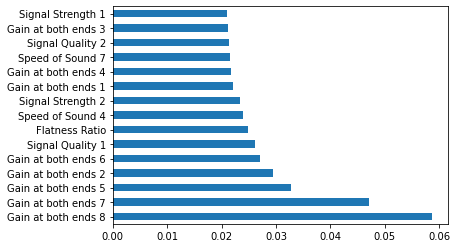

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(full_df_replaced_x, full_df_replaced_y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=full_df_replaced_x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

# Data Pre-processing

### Find Correlation between features

Check for any relation within columns, if there is a direct relation, choose one and remove the other\
We first get an absolute value of correlation, as we are interested in eliminating both strongly negative and positive correlations

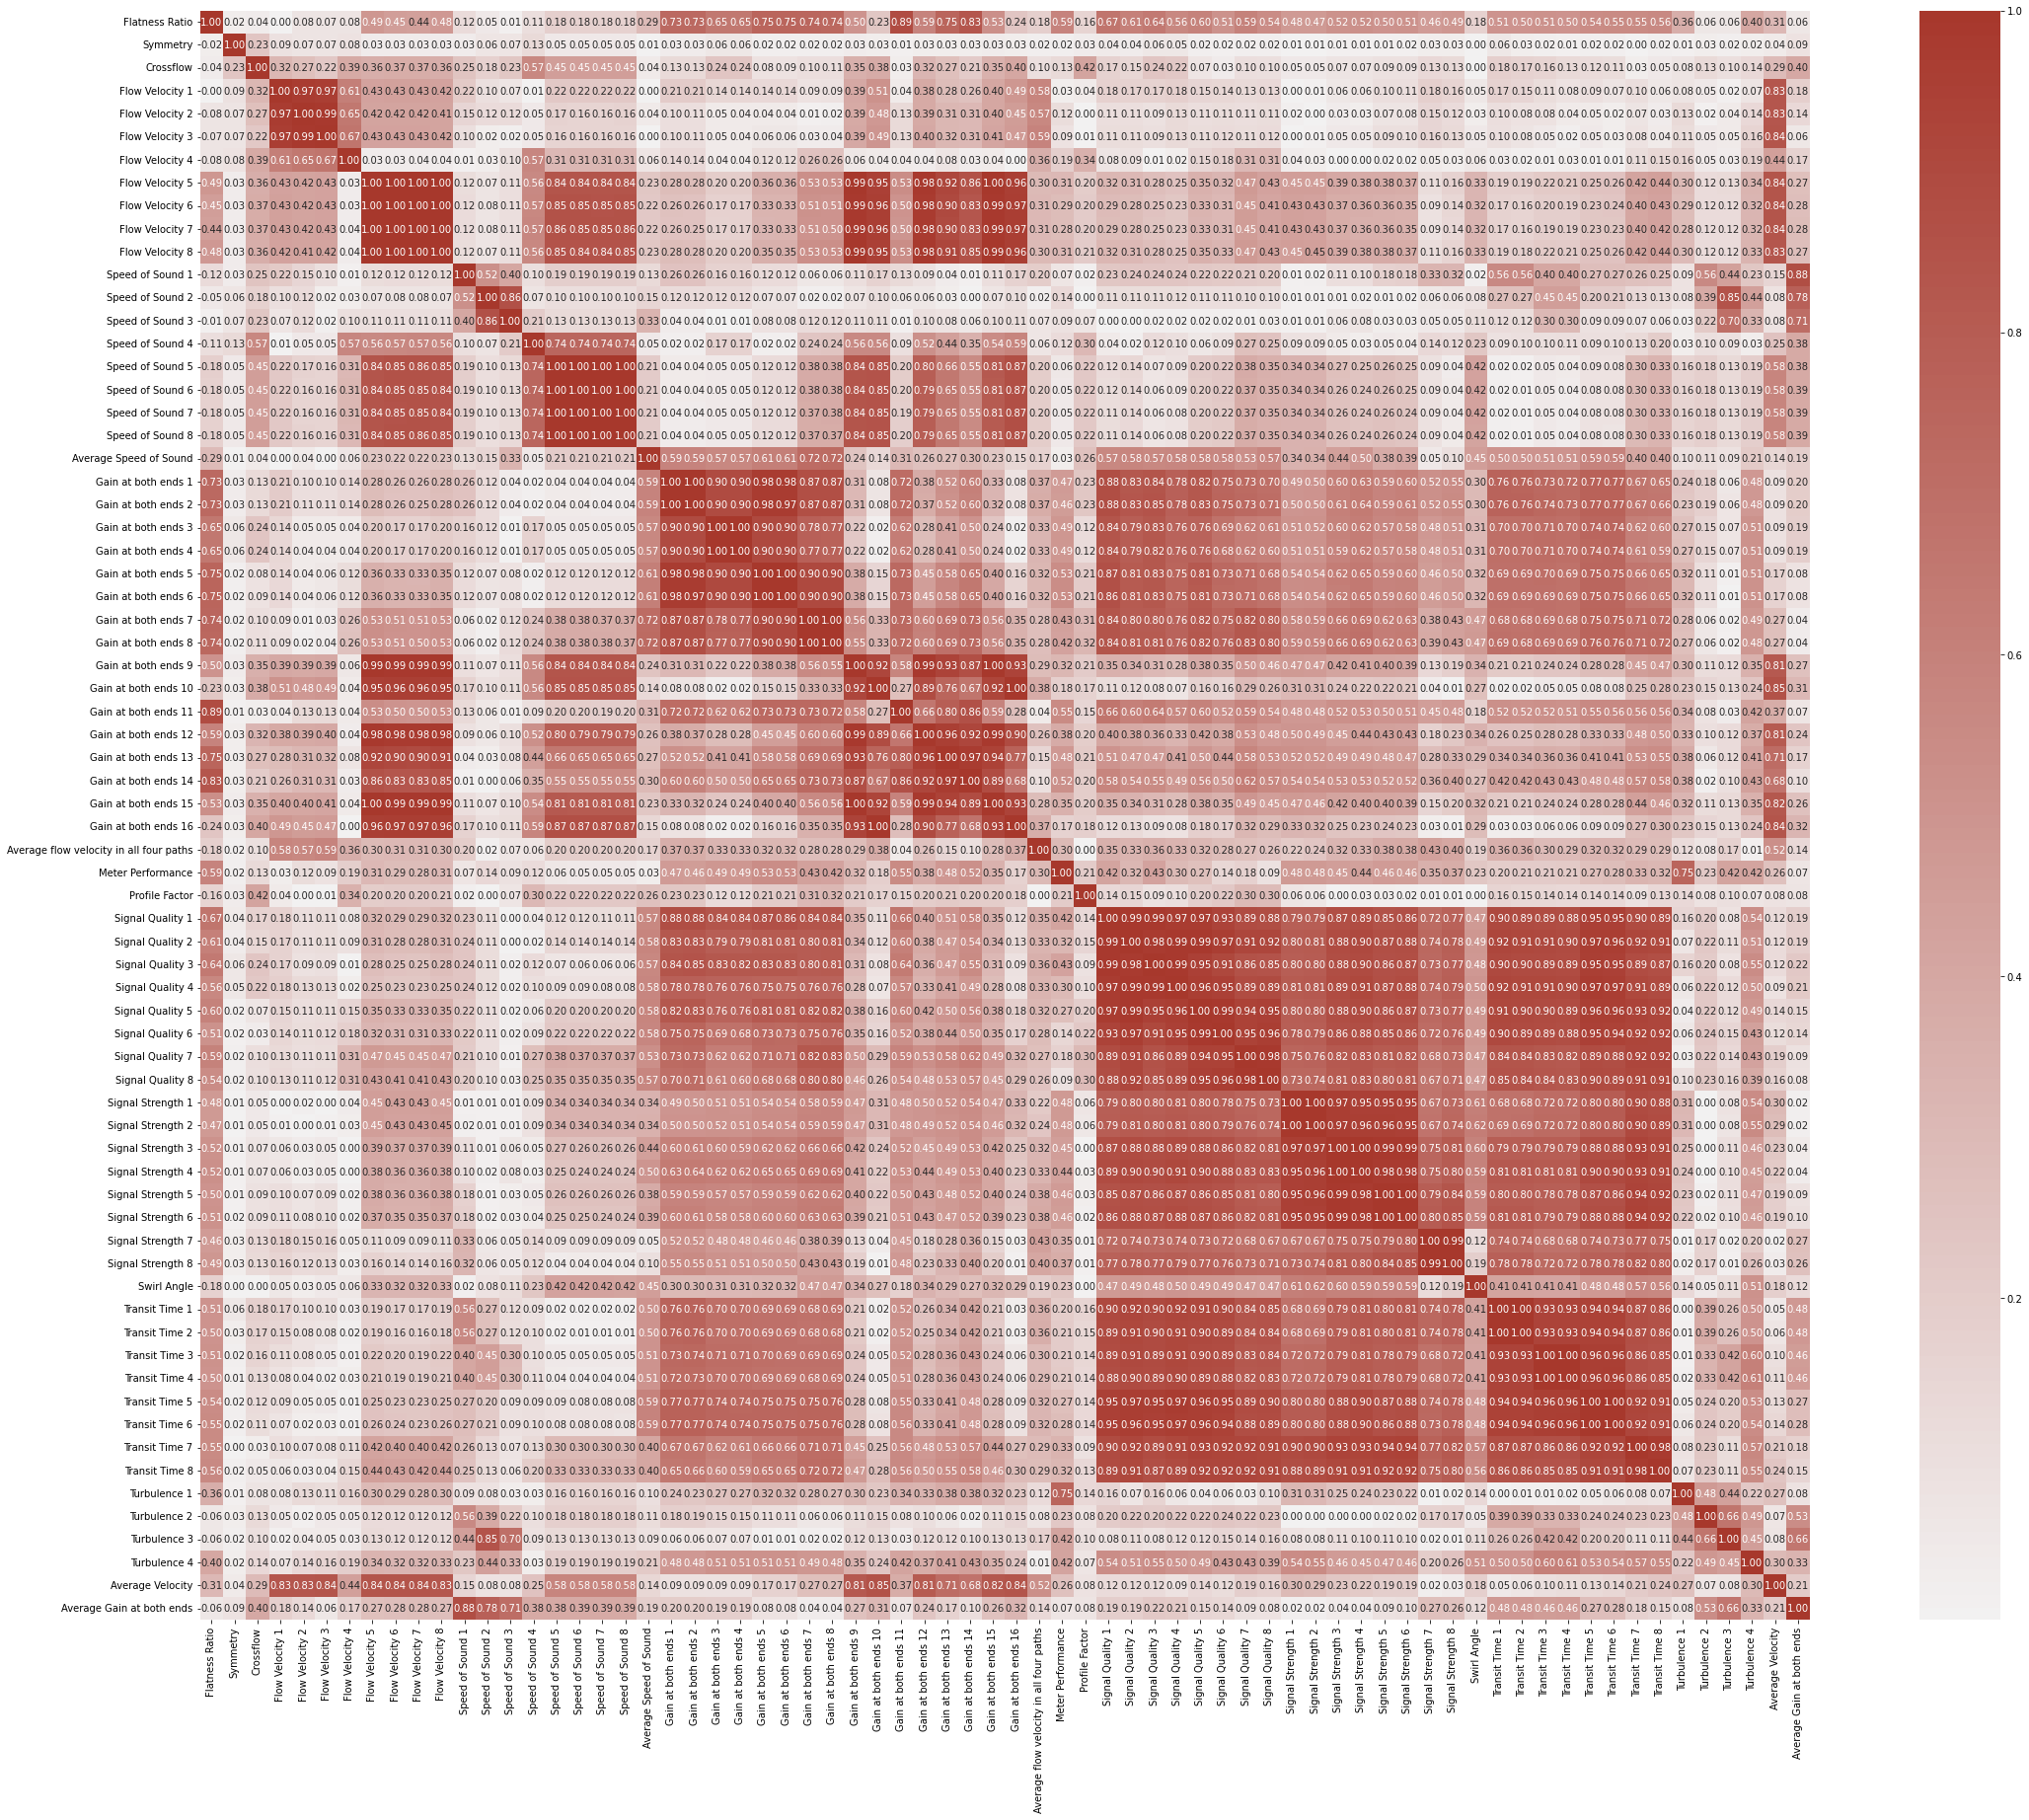

In [15]:
import seaborn as sns

full_corr_matrix_x = full_df_replaced_x.corr().abs()

plt.figure(figsize=(40,30))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(full_corr_matrix_x, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)


See that the two halves are identical. \
To get a more focused and better view of the matrix, we take only the first half, as both halfs are symmetrical. \
Using the mask method, the other half is filled with NaN values, and prevents unecessary computation as these sides are duplicates

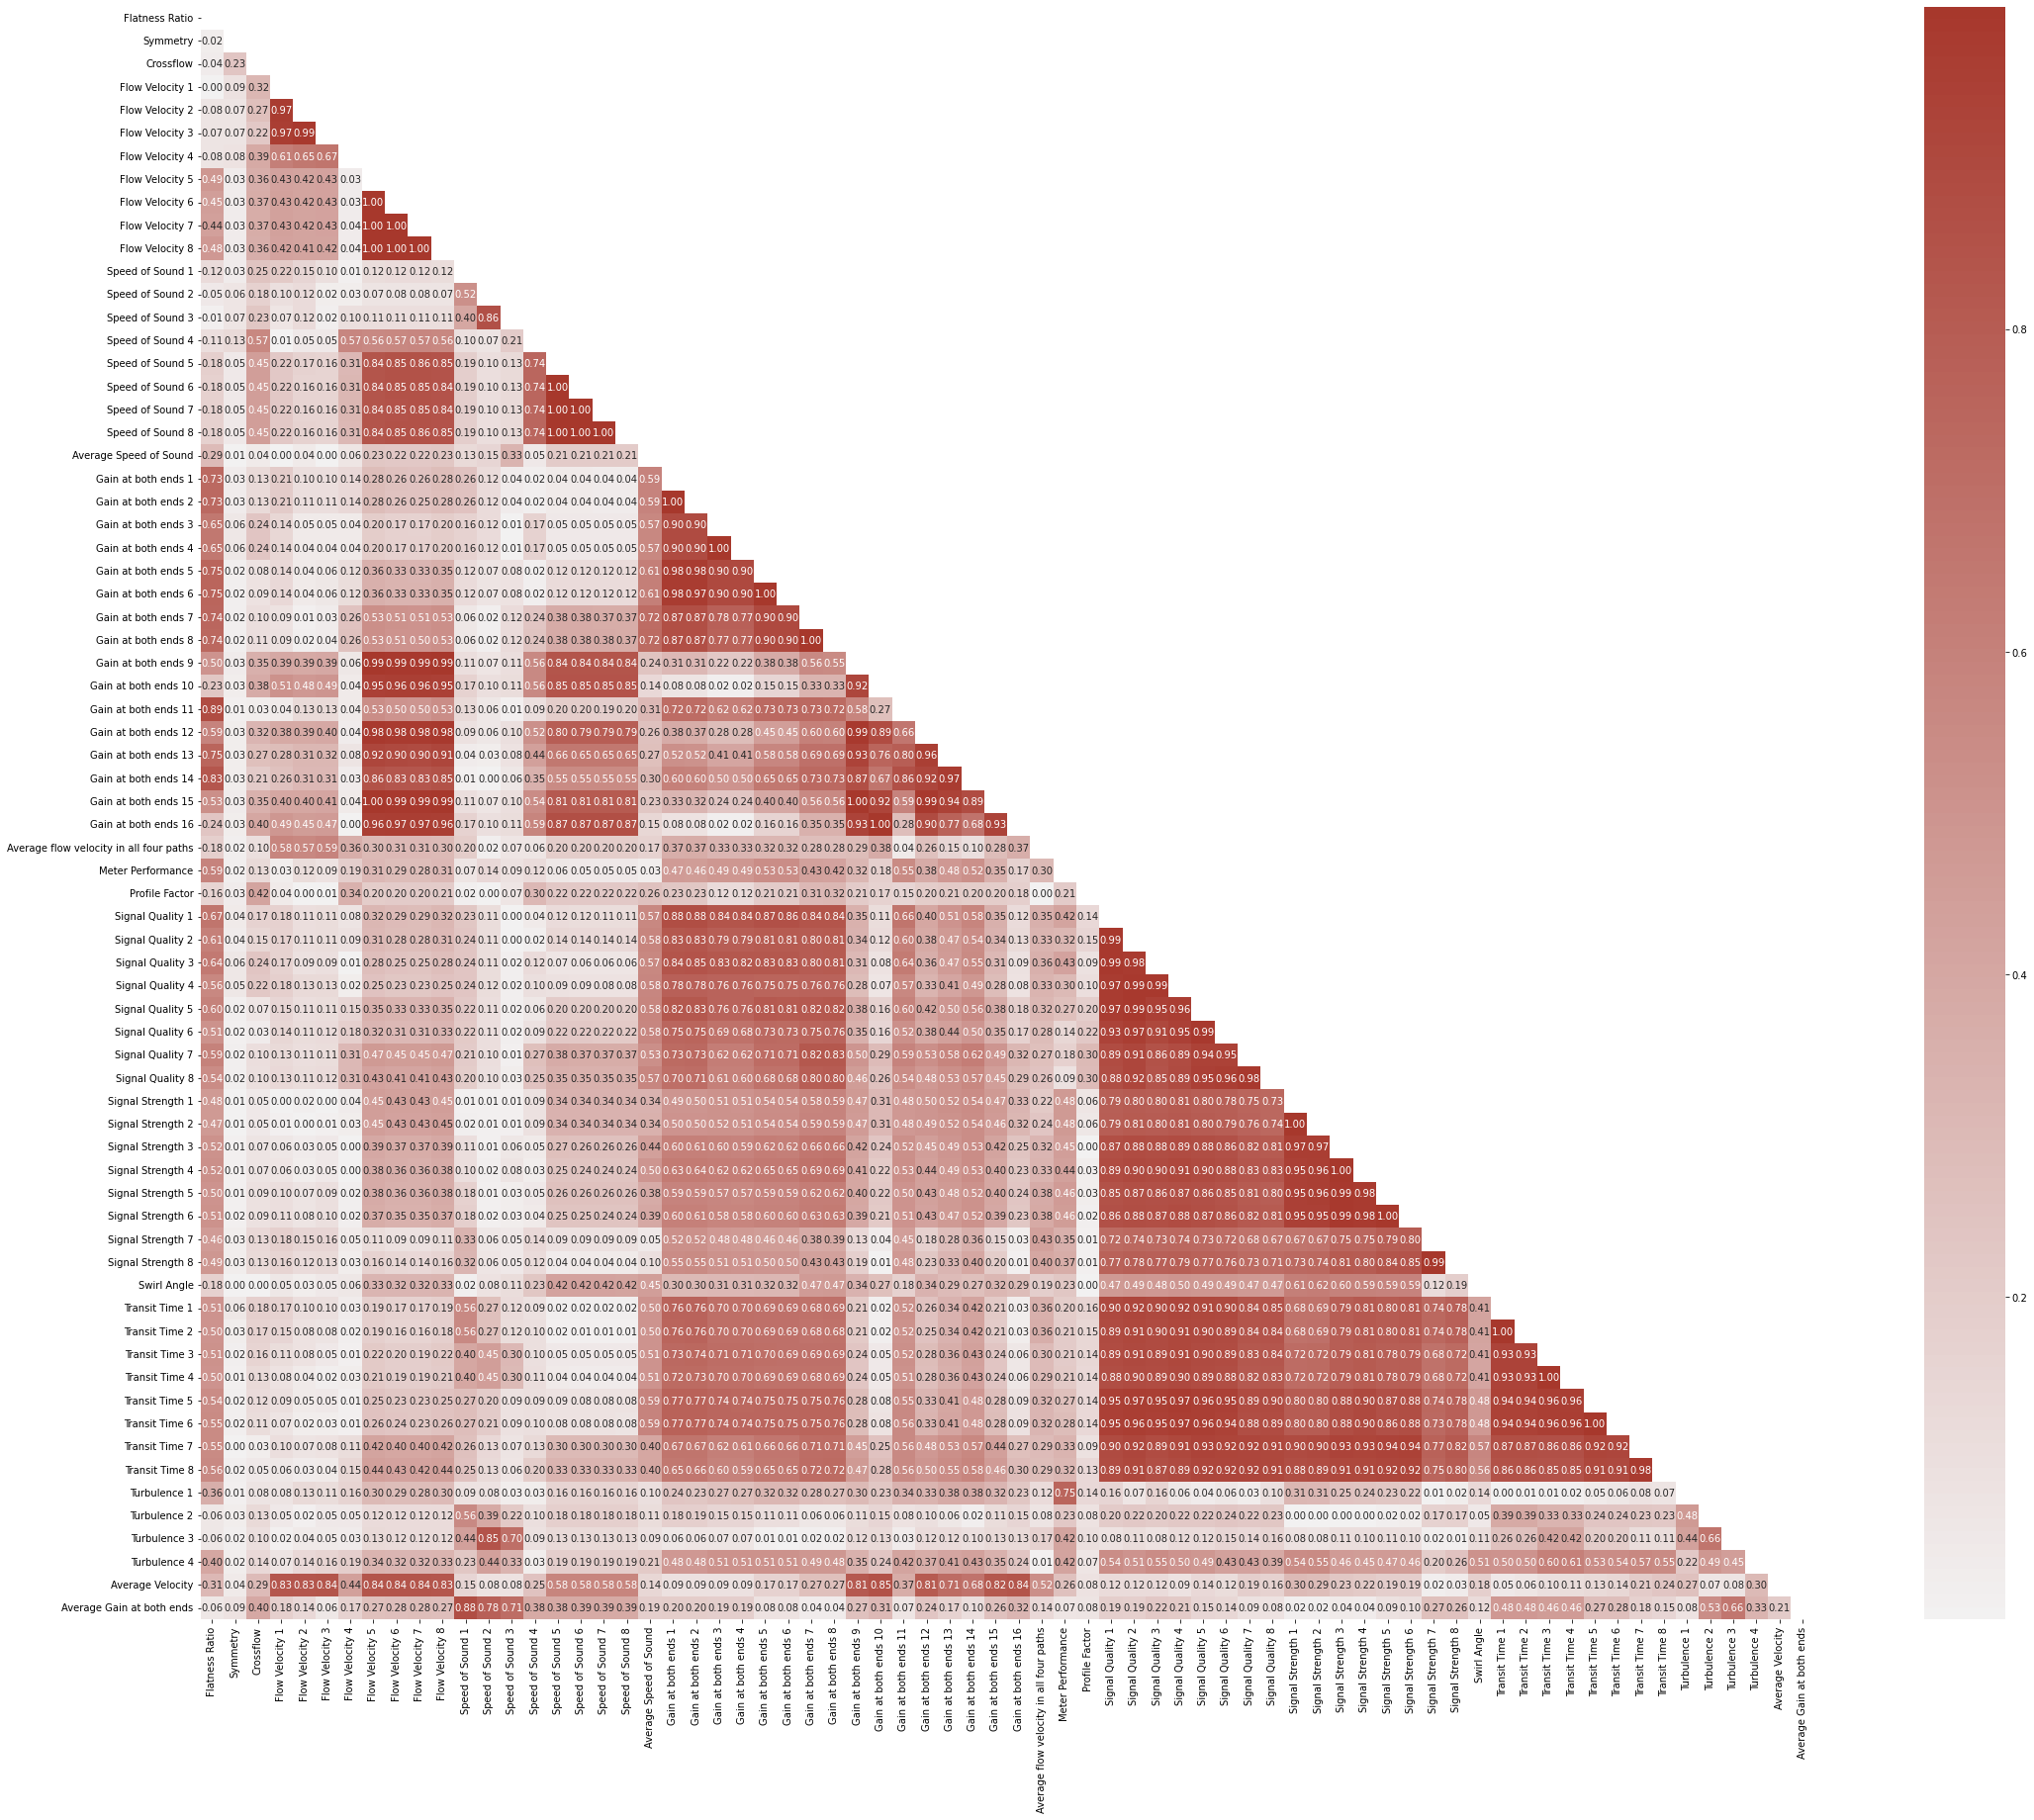

In [16]:
plt.figure(figsize=(40,30))

# Create a mask
mask = np.triu(np.ones_like(full_corr_matrix_x, dtype=bool))

sns.heatmap(full_corr_matrix_x, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

reduced_full_corr_matrix_x = full_corr_matrix_x.mask(mask)

Set a threshold to drop the columns that has strong correlations, and get the list of columns to be dropped

In [17]:
to_drop = [c for c in reduced_full_corr_matrix_x.columns if any(reduced_full_corr_matrix_x[c] > 0.90)]
print(len(to_drop), 'rows to be dropped')
to_drop


42 rows to be dropped


['Flow Velocity 1',
 'Flow Velocity 2',
 'Flow Velocity 5',
 'Flow Velocity 6',
 'Flow Velocity 7',
 'Flow Velocity 8',
 'Speed of Sound 5',
 'Speed of Sound 6',
 'Speed of Sound 7',
 'Gain at both ends 1',
 'Gain at both ends 2',
 'Gain at both ends 3',
 'Gain at both ends 5',
 'Gain at both ends 6',
 'Gain at both ends 7',
 'Gain at both ends 9',
 'Gain at both ends 10',
 'Gain at both ends 12',
 'Gain at both ends 13',
 'Gain at both ends 15',
 'Signal Quality 1',
 'Signal Quality 2',
 'Signal Quality 3',
 'Signal Quality 4',
 'Signal Quality 5',
 'Signal Quality 6',
 'Signal Quality 7',
 'Signal Quality 8',
 'Signal Strength 1',
 'Signal Strength 2',
 'Signal Strength 3',
 'Signal Strength 4',
 'Signal Strength 5',
 'Signal Strength 6',
 'Signal Strength 7',
 'Transit Time 1',
 'Transit Time 2',
 'Transit Time 3',
 'Transit Time 4',
 'Transit Time 5',
 'Transit Time 6',
 'Transit Time 7']

Drop the selected columns, resulting a dataset with redundant features eliminated

In [18]:
full_df_reduced_x = full_df_replaced.drop(to_drop, axis=1)
full_df_reduced_x

,Flatness Ratio,Symmetry,Crossflow,Flow Velocity 3,Flow Velocity 4,Speed of Sound 1,Speed of Sound 2,Speed of Sound 3,Speed of Sound 4,Speed of Sound 8,...,Profile Factor,Signal Strength 8,Swirl Angle,Transit Time 8,Turbulence 1,Turbulence 2,Turbulence 3,Turbulence 4,Average Velocity,Average Gain at both ends
0,0.841499,1.009367,0.993816,10.037759,8.501365,1485.528500,1485.454000,1485.437500,1485.354167,1485.508667,...,1.096966,66.722222,0.041667,123.963333,11.830806,5.142611,5.030472,12.831889,9.350917,1485.391229
1,0.842250,1.006584,0.996605,8.951618,7.612213,1486.042333,1485.992833,1485.973333,1485.867833,1486.033667,...,1.096966,66.722222,0.041667,123.963333,11.830806,5.142611,5.030472,12.831889,8.323063,1485.919896
2,0.840723,1.011647,0.998152,7.857692,6.593117,1486.023667,1485.980833,1485.960000,1485.850500,1486.012333,...,1.096966,66.722222,0.041667,123.963333,11.830806,5.142611,5.030472,12.831889,7.273721,1485.903146
3,0.841119,1.017807,0.996812,6.689885,5.615428,1484.898000,1484.872000,1484.852333,1484.739000,1484.900333,...,1.096966,66.722222,0.111100,123.963333,11.582833,4.994306,4.871361,12.114583,6.214215,1484.790937
4,0.840358,1.016534,0.996221,6.675628,5.623977,1484.361333,1484.331833,1484.313833,1484.205000,1484.364000,...,1.096966,66.722222,0.111100,123.963333,11.582833,4.994306,4.871361,12.114583,6.209143,1484.252875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.819070,5.153846,0.123245,-0.102778,-0.254722,1513.505556,1507.080556,1494.355556,1567.686111,1487.715250,...,4.593220,55.000000,0.209683,117.880278,28.922333,6.204250,6.451889,6.485695,3.847854,1504.110181
355,0.819070,0.214250,0.098034,-0.103889,-2.706944,1521.897222,1474.400000,1500.705556,1555.538889,1487.715250,...,0.173768,55.000000,0.209683,118.631111,28.922333,6.204250,6.451889,6.485695,3.696222,1500.349417
356,0.819070,0.115593,0.134579,-0.098889,-2.772778,1518.072222,1439.802778,1512.719444,1554.647222,1487.715250,...,0.049027,55.000000,0.209683,118.807500,28.922333,6.204250,6.451889,6.485695,3.722403,1496.936917
357,0.812122,0.099441,0.143832,0.029444,-2.613333,1487.083333,1422.211111,1484.836111,1552.894444,1484.557667,...,-0.053056,55.000000,0.209683,118.872778,28.922333,6.204250,6.451889,6.485695,0.668806,1485.577531


[0.02210993 0.00881863 0.00908925 0.00990195 0.01018003 0.00703511
 0.01866839 0.00942248 0.00663418 0.00483841 0.00814637 0.00829509
 0.00976309 0.00947732 0.01905584 0.01671535 0.01569989 0.0149461
 0.02048795 0.02708463 0.02306827 0.03251743 0.02191033 0.02570163
 0.03546803 0.0226004  0.06088606 0.05815136 0.00486275 0.01161237
 0.01278901 0.00559143 0.00765815 0.00618463 0.00877138 0.01125308
 0.00145352 0.00838875 0.00710361 0.02311455 0.01469784 0.01425494
 0.01337158 0.01543635 0.01426023 0.01521458 0.01691902 0.02099063
 0.02464088 0.01073862 0.01145869 0.0049467  0.01032247 0.00982653
 0.02475683 0.00526681 0.01104698 0.00779287 0.01058301 0.00427914
 0.00772815 0.01076816 0.01368955 0.01417066 0.01176776 0.00375748
 0.00679141 0.00586753 0.00698854 0.01220936]


C:\Users\Yi Xuan\AppData\Local\Temp\ipykernel_94988\709949040.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(full_df_replaced_x, full_df_replaced_y)


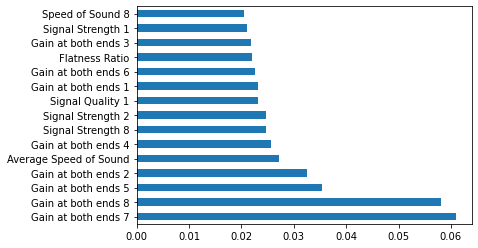

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(full_df_replaced_x, full_df_replaced_y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=full_df_replaced_x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

### Scale the dataset
With the scale of data varying between features, we can normalize the dataset to make the data appear similar across all records and features

In [154]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler


full_df_reduced_x_scaled = MinMaxScaler().fit_transform(full_df_reduced_x)
    
full_df_reduced_x_scaled


array([[0.90162511, 0.79207998, 0.58490341, ..., 0.12451993, 0.99969594,
        0.89324929],
       [0.914832  , 0.79202315, 0.58540239, ..., 0.12451993, 0.88519684,
        0.89465052],
       [0.8879952 , 0.79212653, 0.58567906, ..., 0.12451993, 0.76830401,
        0.89460613],
       ...,
       [0.5074634 , 0.77382932, 0.431187  , ..., 0.01003291, 0.37270022,
        0.92385124],
       [0.38536122, 0.7734995 , 0.43284224, ..., 0.01003291, 0.03254087,
        0.89374308],
       [0.38536122, 0.79013971, 0.61896366, ..., 0.01003291, 0.        ,
        0.89433577]])

# PCA

In [155]:
full_x = full_df_reduced_x_scaled
full_y = full_df_replaced_y.to_numpy()
full_y = np.reshape(full_y, -1)
print(full_x.shape)
print(full_y.shape)

(359, 29)
(359,)


[3.63753886e-01 2.01375269e-01 1.23473480e-01 8.23713772e-02
 5.75878723e-02 4.33870014e-02 3.94384029e-02 1.89692288e-02
 1.18706238e-02 1.14172416e-02 8.26280884e-03 8.02263468e-03
 5.65699690e-03 4.42486444e-03 3.86752154e-03 3.25377653e-03
 2.58134358e-03 2.21170952e-03 2.04039975e-03 1.52040381e-03
 1.39124826e-03 1.06411974e-03 8.86850358e-04 6.36790807e-04
 2.58252506e-04 1.66910535e-04 6.06586935e-05 4.83265361e-05
 1.97172089e-11]
29
Captured eigen varience energy for PC1 to PC10: 0.9113872887829796


Text(0, 0.5, 'cumulative explained variance')

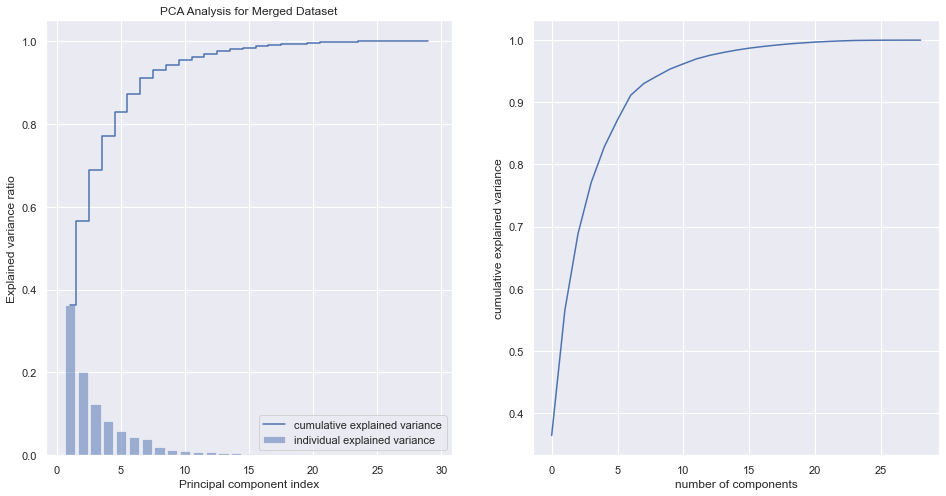

In [156]:
from sklearn.decomposition import PCA

pca_all = PCA()
pca_all.fit(full_x)
tot = sum(pca_all.explained_variance_)
# var_exp = [(i / tot) for i in sorted(pca_all.explained_variance_, reverse=True)]
var_exp = pca_all.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(len(var_exp))
print('Captured eigen varience energy for PC1 to PC7:', sum(var_exp[:7]))
# plot explained variances
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.bar(range(1, full_x.shape[1]+1), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
ax1.step(range(1,full_x.shape[1]+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
ax1.set_ylabel('Explained variance ratio')
ax1.set_xlabel('Principal component index')
ax1.set_title('PCA Analysis for Merged Dataset')
ax1.legend(loc='best')
ax2.plot(np.cumsum(pca_all.explained_variance_ratio_))
ax2.set_xlabel('number of components')
ax2.set_ylabel('cumulative explained variance')

From the above graphs, we see that PC1 to PC7 captures 91.1% of the variation of data, which is sufficient for representation. Therefore, 7 PCS are sufficient.

In [171]:
pca = PCA(n_components=7)
pca.fit(full_x)
full_x_pca=pca.transform(full_x)
# print(meter_a_x_pca_2)
print(full_x_pca.shape) #only 10 PC used

(359, 7)


# Data Mining

Create the train-test split of the data, with 80% training and 20% testing data

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(full_x_pca, full_y, test_size=0.2, random_state=12)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(287, 7) (287,)
(72, 7) (72,)


### Analysing the Dataset

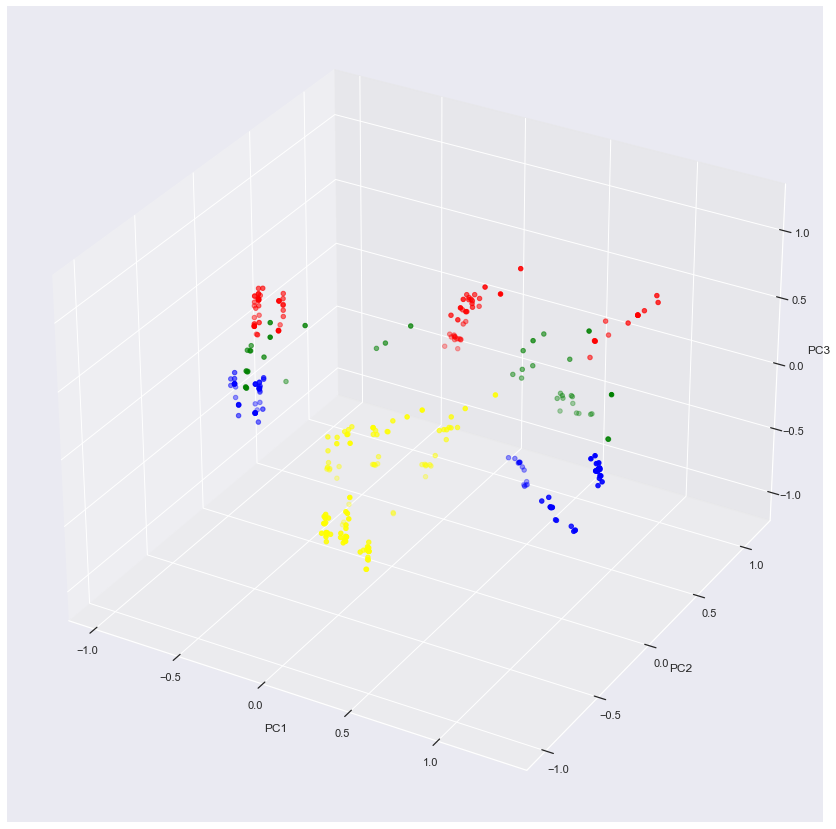

In [159]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection = '3d')

reds = full_y == 1           
greens = full_y == 2
blues = full_y == 3
yellows = full_y == 4
sns.set(style = "darkgrid")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.scatter(xs=full_x_pca[reds, 0], ys=full_x_pca[reds, 1], zs=full_x_pca[reds, 2], c='red')
ax.scatter(xs=full_x_pca[greens, 0], ys=full_x_pca[greens, 1], zs=full_x_pca[greens, 2], c='green')
ax.scatter(xs=full_x_pca[blues, 0], ys=full_x_pca[blues, 1], zs=full_x_pca[blues, 2], c='blue')
ax.scatter(xs=full_x_pca[yellows, 0], ys=full_x_pca[yellows, 1], zs=full_x_pca[yellows, 2], c='yellow')


### Multi-linear Regression

In [160]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, Y_train)
Y_pred_test = regr.predict(X_test)


Visualize and evaluate the Linear Regression Model

Root mean squared error = 0.0615
R-squared = 0.9969


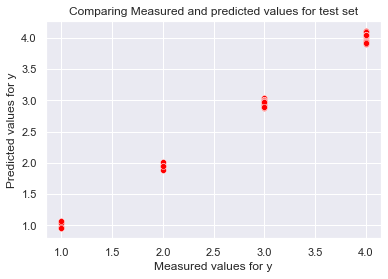

In [173]:
from sklearn.metrics import mean_squared_error, r2_score
sns.scatterplot(x=Y_test, y=Y_pred_test, color='red')
plt.title('Comparing Measured and predicted values for test set')
plt.xlabel('Measured values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(Y_test, Y_pred_test)))
print('R-squared = %.4f' % r2_score(Y_test, Y_pred_test))

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Slope =  0.38919578741143457
Intercept =  2.567863882315509


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Y')

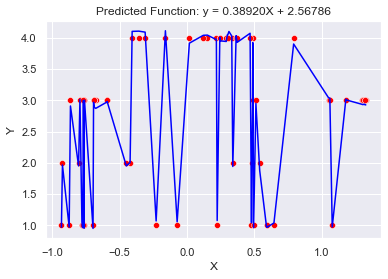

In [162]:
print('Slope = ', regr.coef_[0])   #get the gradient/regression
print('Intercept = ', regr.intercept_)### Step 4: Postprocessing
sns.scatterplot(X_test[:,0], Y_test,  color='red')
sns.lineplot(X_test[:,0], Y_pred_test, color='blue')
titlestr = 'Predicted Function: y = %.5fX + %.5f' % (regr.coef_[0], regr.intercept_)
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('Y')

We see that Linear Regression is not that of a good regressor for our dataset, as the plotted line does not really predict that well

### Decision Tree Classifier

Max Depth = 7 Training Accuracy: 1.0 
Max Depth = 7 Testing Accuracy: 0.9583333333333334


Text(0, 0.5, 'Accuracy')

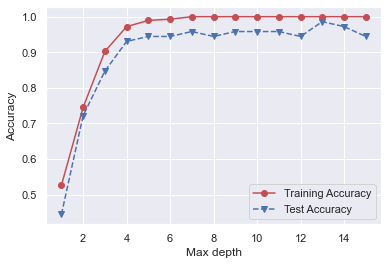

In [163]:
from sklearn import tree
from sklearn.metrics import accuracy_score

maxdepths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAccuracy[index] = accuracy_score(Y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
print('Max Depth = 7 Training Accuracy:', trainAccuracy[6], '\nMax Depth = 7 Testing Accuracy:', testAccuracy[6])   
###########################################################################
# Plot training and test accuracies
##########################################################################
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

We see that the knee point for our test accuracy is at Max Depth = 7. Therefore, we take 7 as the optimal max depth for the decision tree classifier

### K Nearest Neighbours

K=5 Training accuracy: 0.9825783972125436 
K=5 Testing Accuracy 0.9722222222222222


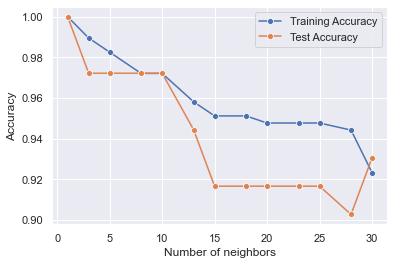

In [164]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1,3,5,8,10,13,15,18,20,23,25,28,30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

sns.lineplot(x=numNeighbors, y=trainAcc, marker='o')
sns.lineplot(x=numNeighbors, y=testAcc, marker='o')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
print('K=5 Training accuracy:', trainAcc[2], '\nK=5 Testing Accuracy', testAcc[2])

We see that the knee point for the above graph is K=5. Therefore, let the optimal K value for K Nearest Neighbours be 5.

### Naive Bayes

In [165]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model.fit(X_train, Y_train)
Y_predTrain = nb_model.predict(X_train)
Y_predTest = nb_model.predict(X_test)
trainAcc=accuracy_score(Y_train, Y_predTrain)
testAcc=accuracy_score(Y_test, Y_predTest)
print("Training Accuracy:",trainAcc)
print("Testing Accuracy:",testAcc)

Training Accuracy: 0.9163763066202091
Testing Accuracy: 0.9027777777777778


### Logistic Regression

C=1 Training Accuracy: 0.975609756097561 
C=1 Testing Accuracy: 0.9444444444444444


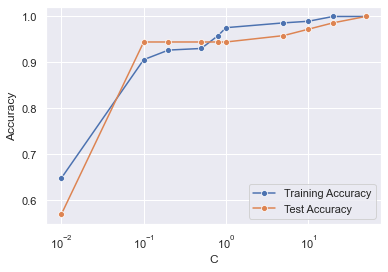

In [166]:
from sklearn.linear_model import LogisticRegression

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtrainAcc = []
LRtestAcc = []

for param in C:
    lr_model = LogisticRegression(C=param, solver='lbfgs')
    lr_model.fit(X_train, Y_train)
    Y_predTrain = lr_model.predict(X_train)
    Y_predTest = lr_model.predict(X_test)
    LRtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(Y_test, Y_predTest))
sns.lineplot(x=C, y=LRtrainAcc, marker="o")
sns.lineplot(x=C, y=LRtestAcc, marker="o")
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print('C=1 Training Accuracy:', LRtrainAcc[5], '\nC=1 Testing Accuracy:', LRtestAcc[5])

We see that the knee point for Logistic Regression is at a inverse regularization strength of 1. Therefore, let the optimal parameters be C=1

### Support Vector Machine

C=1 Training Accuracy: 1.0 
C=1 Testing Accuracy: 1.0


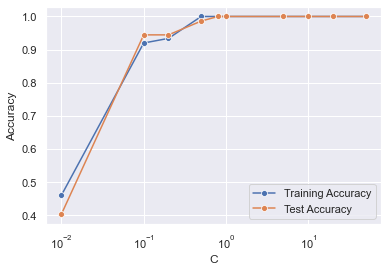

In [167]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    svm_model = SVC(C=param,kernel='linear')
    svm_model.fit(X_train, Y_train)
    Y_predTrain = svm_model.predict(X_train)
    Y_predTest = svm_model.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

sns.lineplot(x=C, y=SVMtrainAcc, marker="o")
sns.lineplot(x=C, y=SVMtestAcc, marker="o")
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print('C=1 Training Accuracy:', SVMtrainAcc[5], '\nC=1 Testing Accuracy:', SVMtestAcc[5])


We see that the knee point for SVM is at a inverse regularization strength of 1. Therefore, let the optimal parameters be C=1

### Non-linear Support Vector Machine

C=3 Training Accuracy: 1.0 
C=3 Testing Accuracy: 1.0


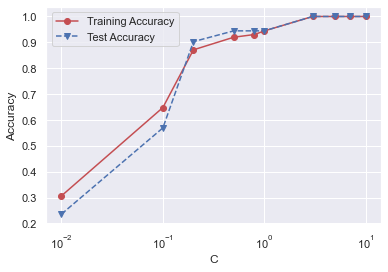

In [168]:

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 3, 5, 7, 10]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    nonlinear_svm_model = SVC(C=param,kernel='rbf',gamma='auto')
    nonlinear_svm_model.fit(X_train, Y_train)
    Y_predTrain = nonlinear_svm_model.predict(X_train)
    Y_predTest = nonlinear_svm_model.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print('C=3 Training Accuracy:', SVMtrainAcc[6], '\nC=3 Testing Accuracy:', SVMtestAcc[6])


We see that the training and test accuracy starts to converge at a regularization parameter of 3. Therefore, we take the 3 as the optimal regularization parameter

### Neural Network

(10,10,10) Training Accuracy: 1.0 
(10,10,10) Testing Accuracy: 1.0


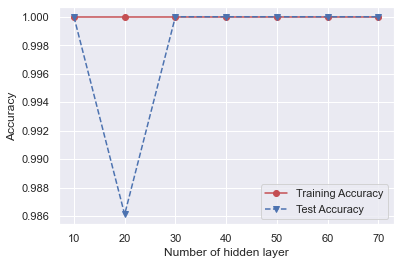

In [169]:
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    nn_model = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=12,max_iter=1000)
    nn_model.fit(X_train, Y_train)
    Y_predTrain = nn_model.predict(X_train)
    Y_predTest = nn_model.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')
print('(10,10,10) Training Accuracy:', trainAcc[0], '\n(10,10,10) Testing Accuracy:', testAcc[0])

We see that across all hidden layer sizes, all of them performs well in terms of accuracy. Therefore, we take (10, 10, 10) as the optimal hidden layer sizes as increasing the sizes does not give any significant improvements.

### Visualisation of Decision Boundary on various classifiers
To better analyse the decision mechanisms of the applied data mining algorithms, we can plot decision boundary visualisations based on these algorithms with our found optimal parameters:
1. Multilinear Linear Regression
2. Decision Tree (Max Depth = 7)
3. K Nearest Neighbours (K=5)
4. Naive Bayes
5. Logistic Regression (C=1)
6. Support Vector Machine (C=1)
7. Non-linear Support Vector Machine (C=3)
8. Neural Network 10-10-10 layers

ValueError: cannot reshape array of size 72 into shape (42,44)

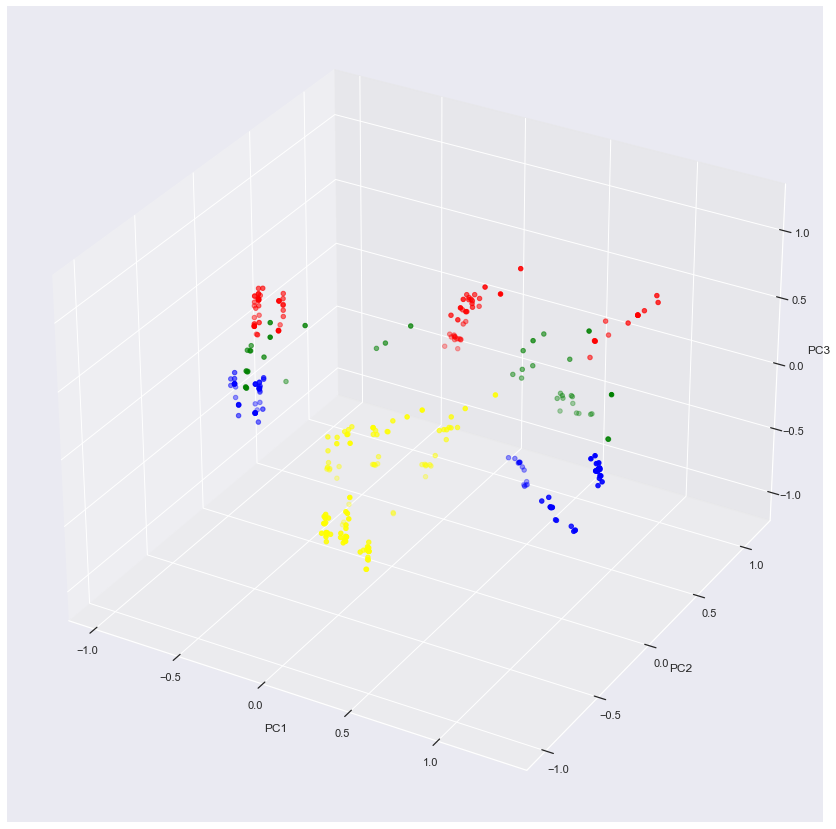

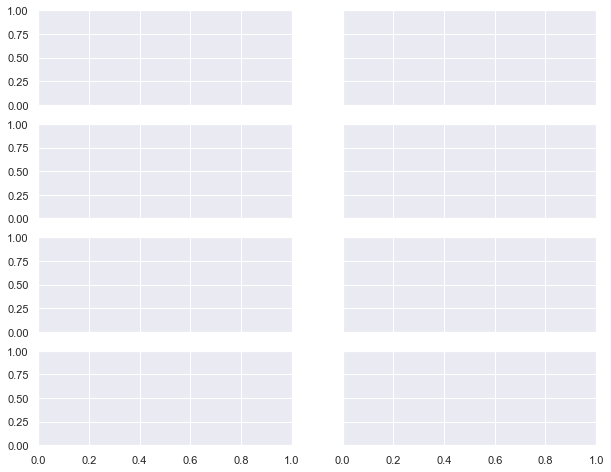

In [170]:
x_min, x_max = full_x_pca[:, 0].min() - 1, full_x_pca[:, 0].max() + 1
y_min, y_max = full_x_pca[:, 1].min() - 1, full_x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

#  Optimal Multivariate Linear Regression
regr_clf = linear_model.LinearRegression()
regr_clf = regr_clf.fit(X_train, Y_train)

#  Optimal Decision Tree Classifier (Max Depth = 7)
tree_clf = tree.DecisionTreeClassifier(max_depth=7)
tree_clf = tree_clf.fit(X_train, Y_train)

# Optimal K Nearest Neighbours (K=5)
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_clf = knn_clf.fit(X_train, Y_train)

# Optimal Naive Bayes
nb_clf = GaussianNB()
nb_clf = nb_clf.fit(X_train, Y_train)

# Optimal Logistic Regression (C=1)
lr_clf = LogisticRegression(C=1, solver='lbfgs')
lr_clf = lr_clf.fit(X_train, Y_train)

# Optimal Support Vector Machine (C=1)
l_svm_clf = SVC(C=1, kernel='linear')
l_svm_clf = l_svm_clf.fit(X_train, Y_train)

# Non-linear Support Vector Machine (C=3)
nl_svm_clf = SVC(C=param,kernel='rbf',gamma='auto')
nl_svm_clf = nl_svm_clf.fit(X_train, Y_train)

# Neural Network (10,10,10) layers
nn_clf = MLPClassifier(solver='adam',hidden_layer_sizes=(10,10,10), learning_rate='adaptive',random_state=12,max_iter=1000)
nn_clf = nn_clf.fit(X_train, Y_train)


# Plot label positions
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection = '3d')

reds = full_y == 1           
greens = full_y == 2
blues = full_y == 3
yellows = full_y == 4
sns.set(style = "darkgrid")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.scatter(xs=full_x_pca[reds, 0], ys=full_x_pca[reds, 1], zs=full_x_pca[reds, 2], c='red')
ax.scatter(xs=full_x_pca[greens, 0], ys=full_x_pca[greens, 1], zs=full_x_pca[greens, 2], c='green')
ax.scatter(xs=full_x_pca[blues, 0], ys=full_x_pca[blues, 1], zs=full_x_pca[blues, 2], c='blue')
ax.scatter(xs=full_x_pca[yellows, 0], ys=full_x_pca[yellows, 1], zs=full_x_pca[yellows, 2], c='yellow')

# Plot decision boundary
f, axarr = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip([[0, 0],[0,1],[1,0],[1,1],[2,0],[2,1],[3,0],[3,1]], [regr_clf,tree_clf,knn_clf,nb_clf,lr_clf,l_svm_clf,nl_svm_clf,nn_clf],['1','2','3','4','5','6','7','8']):

    # Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = clf.predict(X_test)
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z,alpha=0.4)
    axarr[idx[0], idx[1]].set_title(tt)
plt.show()